# Toronto Salary Notebook

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Import modules for this project

In [2]:
#import primary modules
%pip install geopy
import numpy as np  # library to handle data in a vectorized manner
import requests
%pip install lxml
import lxml.html as lh
%pip install openpyxl
print("done")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
done


In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


# Toronto Salary Data

In [4]:
#Scrape Table Cells
url = "https://www.averagesalarysurvey.com/toronto-canada"

#Create a handle, page, to handle the contents of the website
page = requests.get(url)
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

In [5]:
#Check the length of the first 20 rows
[len(T) for T in tr_elements[:20]]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [6]:
#Parse first row as TABLE HEADER
tr_elements = doc.xpath('//tr')

#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d %s' % (i,name))
    col.append((name,[]))
print(name)

1 
                

    
        Toronto Earnings 
    
    
        
                
                
            
                Average salary in Toronto is
                CA$ 77,051.
            
            
                Average take home earning is CA$ 55,095 (Net).
            
            
                The most typical salary is CA$ 52,351 (Gross).
            
            
                These data are from our visitors surveys
                (1,547 individual salaries).
            
            
            
            
            
                "What gets measured gets improved."
                -Peter Drucker
            
        

   Compare your salary with others »

            
            
        
            
                
                    Percentage of people
                    Earn this salary or more
                
            
            
                
                    7 %
                    CA$ 150,678
                
          

In [7]:
#CREATE A DATAFRAME
#First row is the header .'. data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 3, the //tr data is not from our table 
    if len(T)!=2:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [8]:
#CHECK length of each column
[len(C) for (title,C) in col]

[8, 8]

In [9]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

In [10]:
df.head()
#df.shape

\r\n                \r\n\r\n    \r\n        Toronto Earnings \r\n    \r\n    \r\n        \r\n                \r\n                \r\n            \r\n                Average salary in Toronto is\r\n                CA$ 77,051.\r\n            \r\n            \r\n                Average take home earning is CA$ 55,095 (Net).\r\n            \r\n            \r\n                The most typical salary is CA$ 52,351 (Gross).\r\n            \r\n            \r\n                These data are from our visitors surveys\r\n                (1,547 individual salaries).\r\n            \r\n            \r\n            \r\n            \r\n            \r\n                "What gets measured gets improved."\r\n                -Peter Drucker\r\n            \r\n        \r\n\r\n   Compare your salary with others »\r\n\r\n            \r\n            \r\n        \r\n            \r\n                \r\n                    Percentage of people\r\n                    Earn this salary or more\r\n                \r\n            \r\n            \r\n                \r\n                    7 %\r\n                    CA$ 150,678\r\n                \r\n                \r\n                    10 %\r\n                    CA$ 132,249\r\n                \r\n                \r\n                    23 %\r\n                    CA$ 101,407\r\n                \r\n                \r\n                    61 %\r\n                    CA$ 62,895\r\n                \r\n                \r\n                    88 %\r\n                    CA$ 43,473\r\n                \r\n                \r\n                    96 %\r\n                    CA$ 33,866\r\n                \r\n                \r\n                    99 %\r\n                    CA$ 23,572\r\n                \r\n            \r\n        \r\n\r\n\r\n            \r\n                \r\n                    \r\n                        Career\r\n                        Avg. gross salary\r\n                            (USD)\r\n                        Salary entries\r\n                    \r\n                \r\n                \r\n                        \r\n                            Software Developer\r\n                            CA$ 78,986\r\n                                US$ 69,273\r\n                            36\r\n                        \r\n                        \r\n                            Director\r\n                            CA$ 137,864\r\n                                US$ 125,592\r\n                            31\r\n                        \r\n                        \r\n                            IT Manager\r\n                            CA$ 102,108\r\n                                US$ 89,004\r\n                            27\r\n                        \r\n                        \r\n                            Manager\r\n                            CA$ 94,259\r\n                                US$ 82,598\r\n                            27\r\n                        \r\n                        \r\n                            Engineer\r\n                            CA$ 62,884\r\n                                US$ 58,407\r\n                            27\r\n                        \r\n                        \r\n                            Marketing Manager\r\n                            CA$ 88,065\r\n                                US$ 77,677\r\n                            23\r\n                        \r\n                        \r\n                            Software Engineer\r\n                            CA$ 80,341\r\n                                US$ 77,118\r\n                            20\r\n                        \r\n                        \r\n                            Electrical Engineer\r\n                            CA$ 66,842\r\n                                US$ 64,104\r\n                            19\r\n                        \r\n                        \r\n                            Chartered Accountant\r\n                            CA$ 83,900\r\n                        

In [11]:
df.columns

Index(['\r\n                \r\n\r\n    \r\n        Toronto Earnings \r\n    \r\n    \r\n        \r\n                \r\n                \r\n            \r\n                Average salary in Toronto is\r\n                CA$ 77,051.\r\n            \r\n            \r\n                Average take home earning is CA$ 55,095 (Net).\r\n            \r\n            \r\n                The most typical salary is CA$ 52,351 (Gross).\r\n            \r\n            \r\n                These data are from our visitors surveys\r\n                (1,547 individual salaries).\r\n            \r\n            \r\n            \r\n            \r\n            \r\n                "What gets measured gets improved."\r\n                -Peter Drucker\r\n            \r\n        \r\n\r\n   Compare your salary with others »\r\n\r\n            \r\n            \r\n        \r\n            \r\n                \r\n                    Percentage of people\r\n                    Earn this salary or more\r\n           

In [12]:
#remove the garbage first row
new_header = df.iloc[0] 

df = df[1:] 

df.columns = new_header

df.head()

,Percentage of people,Earn this salary or more
1,7 %,"CA$ 150,678"
2,10 %,"CA$ 132,249"
3,23 %,"CA$ 101,407"
4,61 %,"CA$ 62,895"
5,88 %,"CA$ 43,473"


In [13]:
#string surgery, convert those strings to numbers removing $ and , and CA
df['Percentage of people'] = df['Percentage of people'].replace({'\$':''}, regex = True)
df['Percentage of people'] = df['Percentage of people'].replace({',': ''},regex = True)  # assuming ',' is the thousand's separator in your locale
df['Percentage of people'] = df['Percentage of people'].replace({'%': ''},regex = True)

df['Earn this salary or more'] = df['Earn this salary or more'].replace({'\$':''}, regex = True)
df['Earn this salary or more'] = df['Earn this salary or more'].replace({',': ''},regex = True)  # assuming ',' is the thousand's separator in your locale
df['Earn this salary or more'] = df['Earn this salary or more'].replace({'%': ''},regex = True)
df['Earn this salary or more'] = df['Earn this salary or more'].replace({'CA':''}, regex = True)
df

,Percentage of people,Earn this salary or more
1,7,150678
2,10,132249
3,23,101407
4,61,62895
5,88,43473
6,96,33866
7,99,23572


In [14]:
df2 = df
df2['Percentage of people'] = df['Percentage of people'].astype(float)
df2['Earn this salary or more'] = df['Earn this salary or more'].astype(float)
df2

,Percentage of people,Earn this salary or more
1,7.0,150678.0
2,10.0,132249.0
3,23.0,101407.0
4,61.0,62895.0
5,88.0,43473.0
6,96.0,33866.0
7,99.0,23572.0


In [15]:
df2.set_index("Percentage of people", inplace = True) 

In [16]:
df2

,Earn this salary or more
Percentage of people,
7.0,150678.0
10.0,132249.0
23.0,101407.0
61.0,62895.0
88.0,43473.0
96.0,33866.0
99.0,23572.0


In [17]:
### type your answer here
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

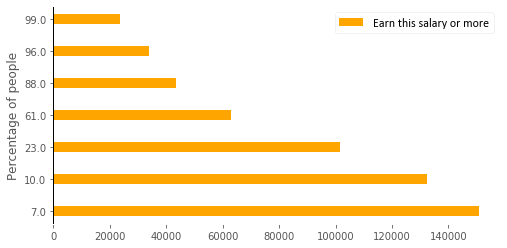

<Figure size 432x288 with 0 Axes>

In [18]:
import numpy as np
import matplotlib.pyplot as plt


colors_list = ['orange', '#002868']

#artist formula for bar chart using df2 dataframe
ax = df.plot(kind='barh', alpha=1, figsize=(8, 4), width=0.3,color = colors_list )
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)


font = {'family' : 'calibri',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plt.legend(fontsize=10)

ax.patch.set_facecolor('white')
plt.legend(facecolor='white', framealpha=0.5)
#plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')

ax.spines['left'].set_color('black')

plt.show()
###########################################
plt.savefig('salary.png')

The end :)